In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
listings = pd.read_excel(r"C:\Users\akshayk\Downloads\Listings Data.xlsx")


In [3]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.518100e+04,1.518100e+04,1.518100e+04,11535.000000,0.0,15178.000000,15178.000000,0.0,15181.000000,15181.000000,...,12864.000000,12844.000000,12847.000000,12829.000000,12850.000000,12830.000000,12829.000000,0.0,15181.000000,13001.000000
mean,9.733629e+06,2.017040e+13,3.106406e+07,0.944733,NaN,3.404994,3.404994,NaN,52.365353,4.889025,...,93.903762,9.599346,9.417452,9.697872,9.743502,9.380281,9.172500,NaN,2.934787,1.211981
std,5.366683e+06,0.000000e+00,3.166049e+07,0.141310,NaN,11.324173,11.324173,NaN,0.015738,0.034901,...,6.937112,0.745629,0.904871,0.681219,0.635829,0.773500,0.831879,NaN,8.968696,1.342843
min,2.818000e+03,2.017040e+13,3.159000e+03,0.000000,NaN,0.000000,0.000000,NaN,52.290308,4.753513,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.020000
25%,5.117824e+06,2.017040e+13,6.701188e+06,0.970000,NaN,1.000000,1.000000,NaN,52.355616,4.865016,...,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.340000
50%,1.008104e+07,2.017040e+13,1.807277e+07,1.000000,NaN,1.000000,1.000000,NaN,52.365028,4.886344,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.750000
75%,1.431790e+07,2.017040e+13,4.714416e+07,1.000000,NaN,1.000000,1.000000,NaN,52.374829,4.907857,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,1.801401e+07,2.017040e+13,1.238477e+08,1.000000,NaN,106.000000,106.000000,NaN,52.426224,5.027689,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,91.000000,12.650000


In [4]:
# removing unwanted columns after manually analysing the dataset rather than mking a large 
#correlation matrix 
original_dataset = listings.copy()
not_needed = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_location',
       'host_about',  'host_response_rate',
       'host_acceptance_rate', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 
        'host_has_profile_pic',
        'market', 'smart_location', 'country_code', 'country',
       'weekly_price', 'monthly_price','calendar_last_scraped','city','state','calendar_updated','first_review',
       'last_review']
listings.drop(not_needed, axis=1, inplace=True)

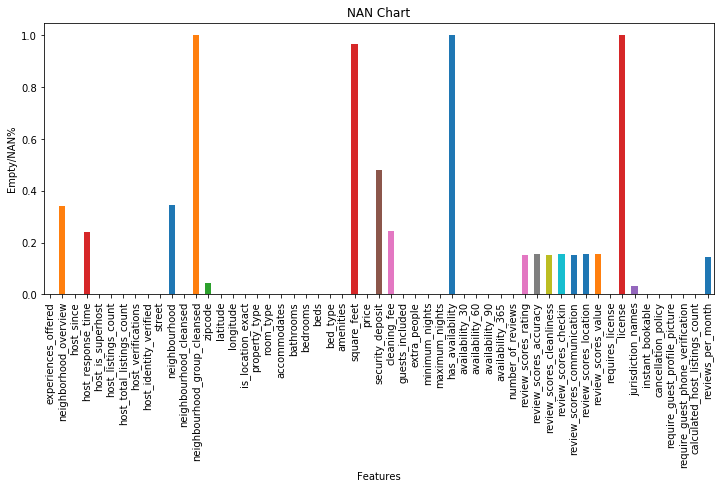

In [5]:
# Check columns with nan/empty values
percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', figsize = (12, 5))
ax.set_xlabel('Features')
ax.set_ylabel('Empty/NAN%')
ax.set_title('NAN Chart')
plt.show()

In [6]:
#removing columns with more than 30% empty or nan values
empty_cols = ['neighbourhood', 'neighbourhood_group_cleansed','neighborhood_overview',
              'square_feet', 'has_availability', 'license','jurisdiction_names','experiences_offered' ]

listings.drop(empty_cols, axis=1, inplace=True)


Index(['host_response_time', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')


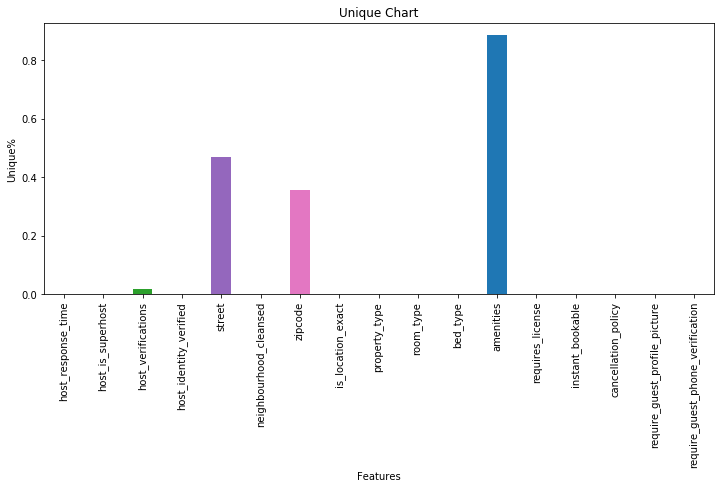

In [7]:
#Check for unique values on categroical data
categories = listings.columns[listings.dtypes == 'object']
print(categories)
percentage_unique = listings[categories].nunique() / listings.shape[0]
ax = percentage_unique.plot(kind = 'bar', figsize = (12, 5))
ax.set_xlabel('Features')
ax.set_ylabel('Unique%')
ax.set_title('Unique Chart')
plt.show()

In [8]:
#removing unique values as they wont offer correlation with price
unique_cols = ['street','amenities','zipcode']
listings.drop(unique_cols, axis=1, inplace=True)

In [9]:
# replacing t/f with 1/0 to all boolean values
bool_attributes = ['host_is_superhost', 'host_identity_verified', 'is_location_exact', 
                    'requires_license','instant_bookable', 'require_guest_profile_picture', 
                   'require_guest_phone_verification']

replace_dict = {'f' : 0 , 't' : 1}

for cols in bool_attributes : 
    listings[cols]=listings[cols].replace(replace_dict)

In [10]:
# Converting host_since to days till today

import datetime     
now = datetime.date.today()
today = pd.Timestamp(now)

listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['now'] = today
listings['host_since'] = listings['now'].sub(listings['host_since'], axis=0).dt.days

del  listings['now']

In [11]:
# Converting host_response_time to number

replace_dict = {'within an hour' : 1 , 'within a few hours' : 2 , 'within a day' : 3 ,  'a few days or more': 4}
listings['host_response_time'].replace(replace_dict , inplace=True)

In [12]:
# changing host verification documents to number of records need for verification for better data processing

listings['host_verifications'] = listings.host_verifications.apply(lambda x: x.strip('[]').split(','))
listings['number_of_documents'] = listings['host_verifications'].str.len()
del listings['host_verifications']

In [13]:
from geopy.distance import vincenty

def distance_calc (row):
    start = (row['latitude'], row['longitude'])
    stop = (52.379189, 4.899431)

    return vincenty(start, stop).meters

# Calculating the distance from amsterdam central using lat/long as it might effects prices
listings['distance_from_central'] = listings.apply (lambda row: distance_calc (row),axis=1)

del listings['latitude']
del listings['longitude']

In [14]:
# Converted property type and room type to unique number with pandas category

for cols in ['property_type','room_type','bed_type','neighbourhood_cleansed','cancellation_policy']:
    listings[cols] = listings[cols].astype('category')
    listings[cols] = listings[cols].cat.codes


KeyboardInterrupt: 

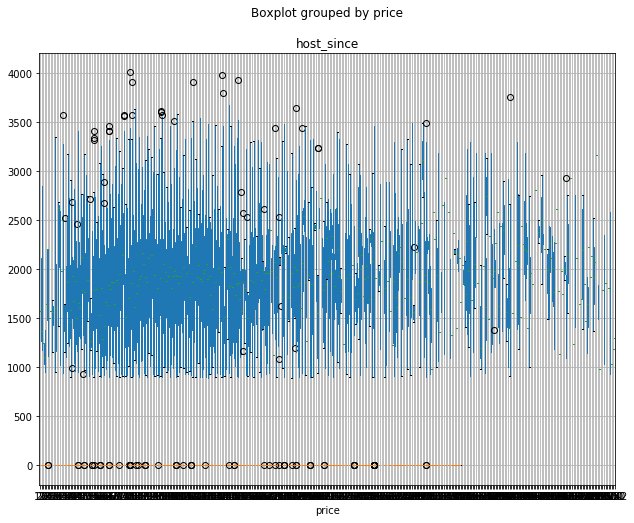

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
for cols in listings:
    listings.boxplot(column=[cols], by='price', ax=ax)
plt.show()

In [16]:
# with above boxplots wrt to price we are able to detect outliers wrt to price

#Two airbnbs with 13 and 17 have price not according to trend so we can remove this
listings.drop(listings[listings['accommodates'] == 13].index,inplace=True)
listings.drop(listings[listings['accommodates'] == 17].index,inplace=True)

In [17]:
# removing $ from currency features
listings['price'] = listings['price'].astype(str).str.replace('\$|,', '')
listings['price'] = pd.to_numeric(listings['price'])

listings['extra_people'] = listings['extra_people'].astype(str).str.replace('\$|,', '')
listings['extra_people'] = pd.to_numeric(listings['extra_people'])

In [18]:
# checking for NAN values and count

listings.isna().any()
listings.isna().sum()

host_since                             3
host_response_time                  3646
host_is_superhost                      3
host_listings_count                    3
host_total_listings_count              3
host_identity_verified                 3
neighbourhood_cleansed                 0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             18
bedrooms                              11
beds                                  17
bed_type                               0
price                                  0
security_deposit                    7303
cleaning_fee                        3713
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90 

In [19]:
# Handling NAN values
replace_with_mean = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_value',
                     'host_response_time','host_since','availability_30', 
                      'availability_60', 'availability_90','review_scores_checkin','review_scores_location']

replace_with_mode = ['bathrooms','beds','bedrooms','reviews_per_month','review_scores_communication',
                     'calculated_host_listings_count','host_listings_count','requires_license']

replace_with_zero = ['host_is_superhost','host_total_listings_count','host_identity_verified','security_deposit'
                     ,'cleaning_fee']

for cols in replace_with_mean:
    listings[cols] = listings[cols].fillna(listings[cols].mean())
for cols in replace_with_mode:
    listings[cols] = listings[cols].fillna(listings[cols].mode()[0])
for cols in replace_with_zero:
    listings[cols] = listings[cols].fillna(0)



In [20]:
listings.isna().any()
listings.isna().sum()

host_since                          0
host_response_time                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_identity_verified              0
neighbourhood_cleansed              0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_re

Text(0.5,1,'Heatmap of Correlation Matrix')

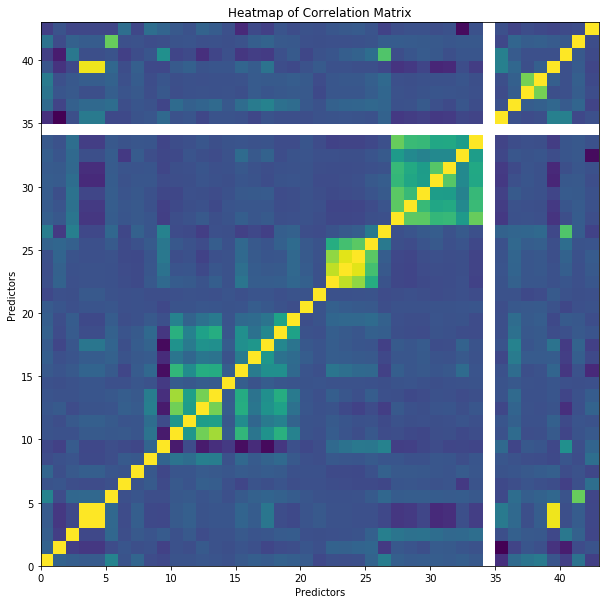

In [21]:
corr_matrix = listings.corr()
plt.figure(figsize=(10, 10))
plt.pcolor(corr_matrix)
plt.xlabel('Predictors')
plt.ylabel('Predictors')
plt.title('Heatmap of Correlation Matrix')

c:\users\akshayk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


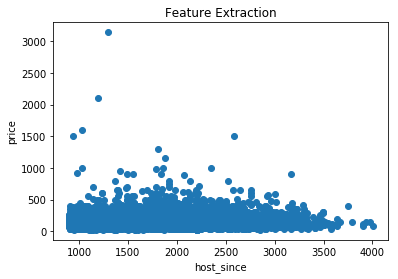

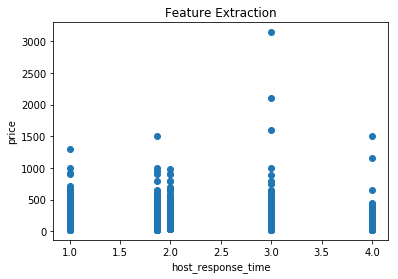

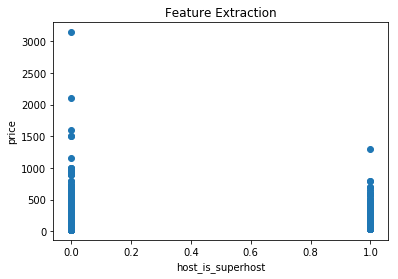

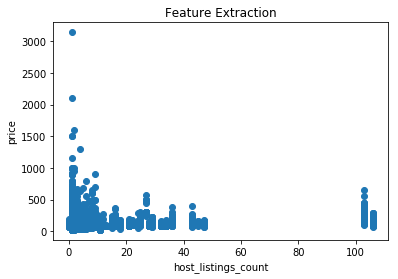

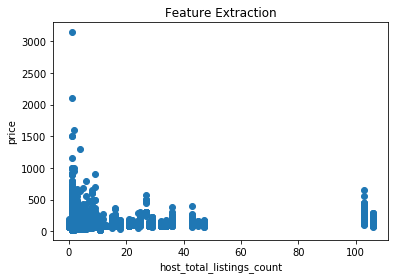

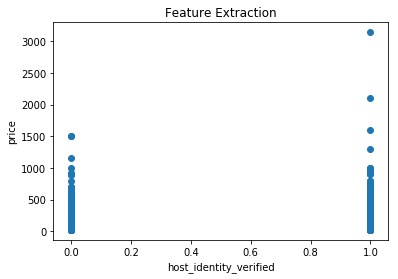

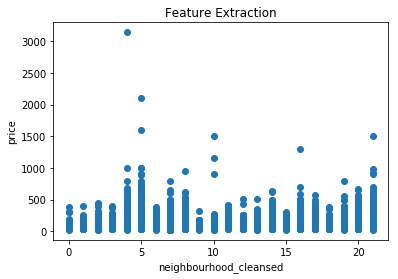

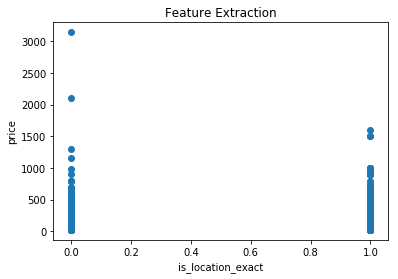

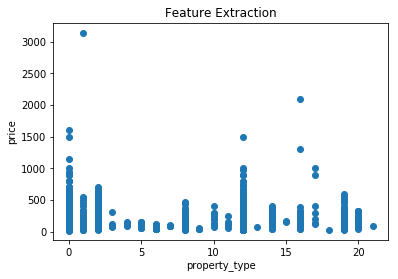

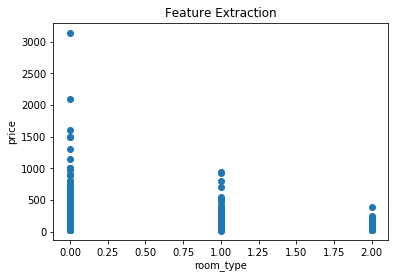

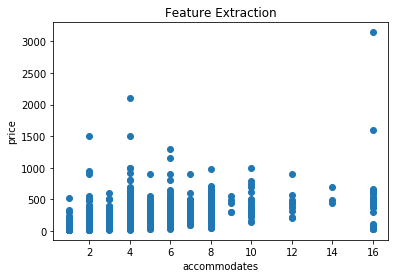

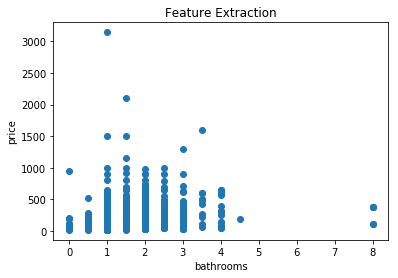

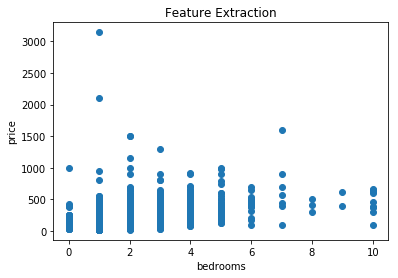

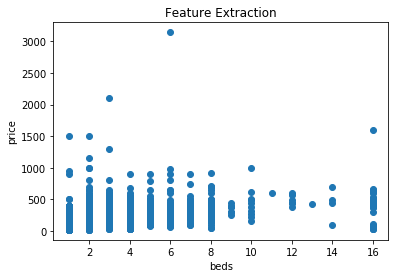

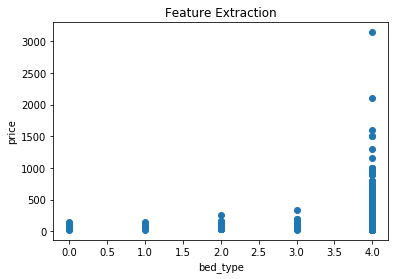

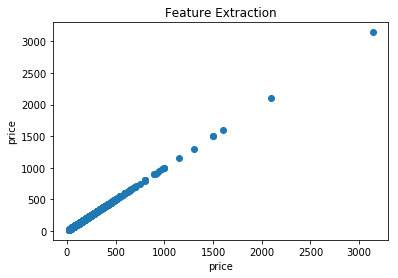

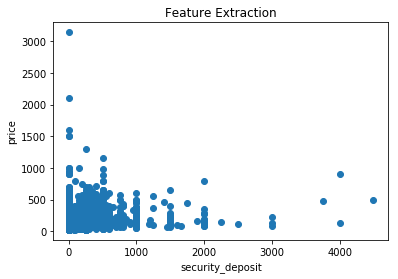

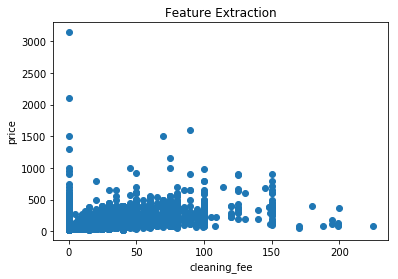

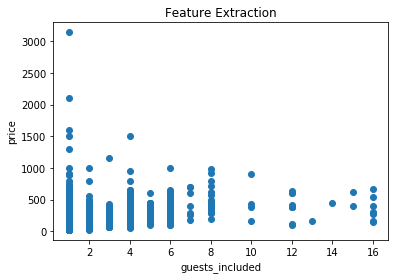

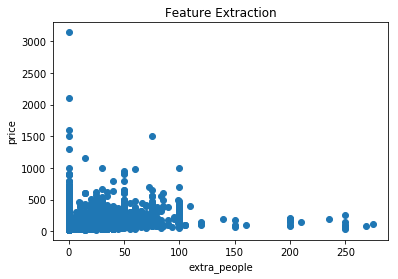

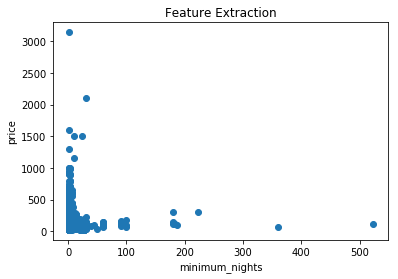

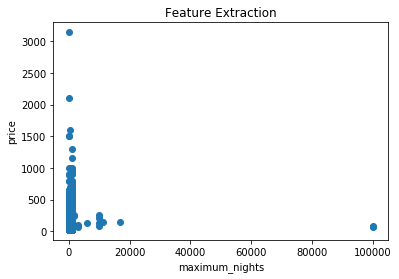

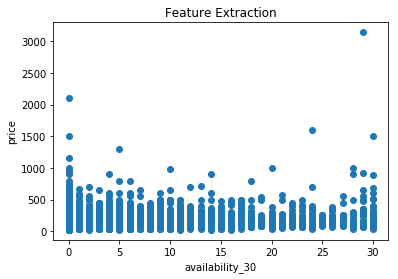

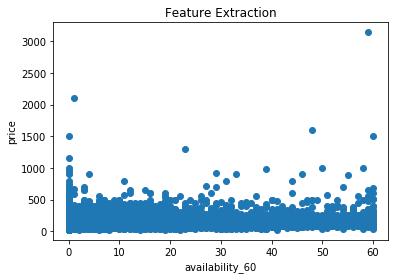

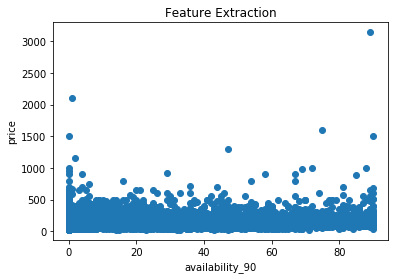

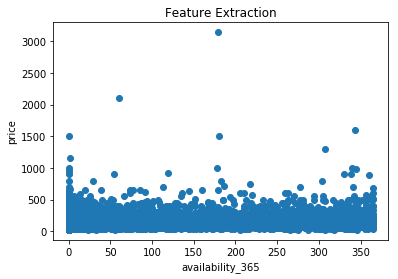

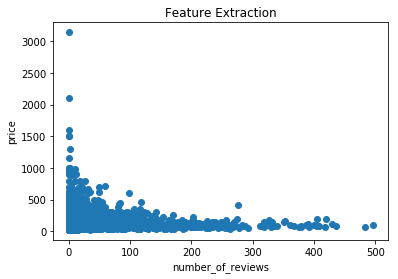

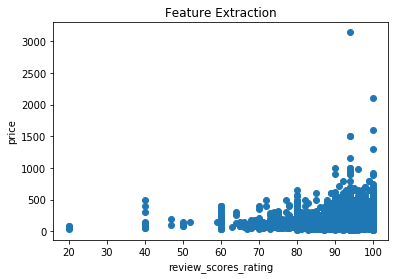

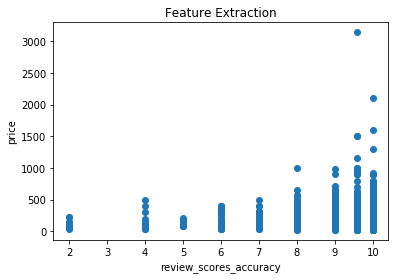

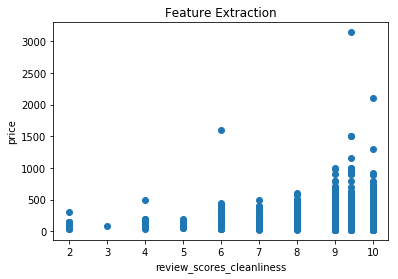

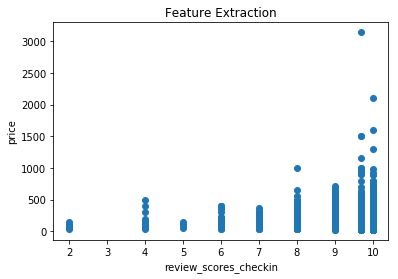

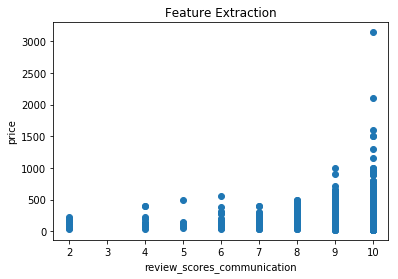

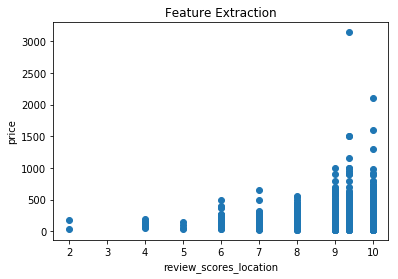

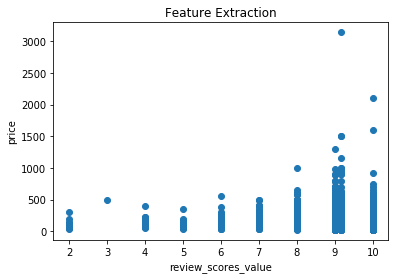

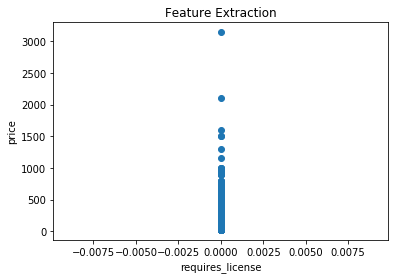

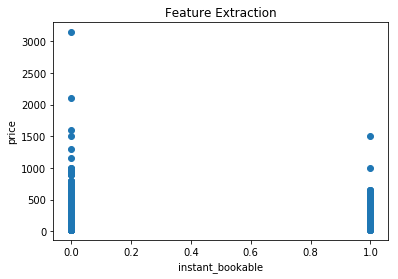

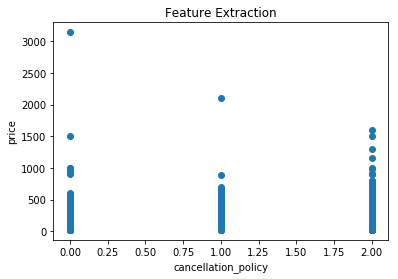

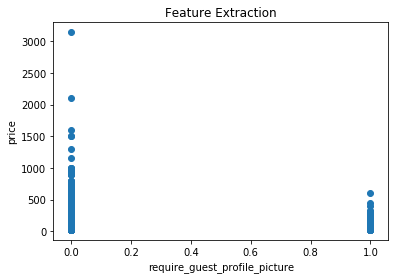

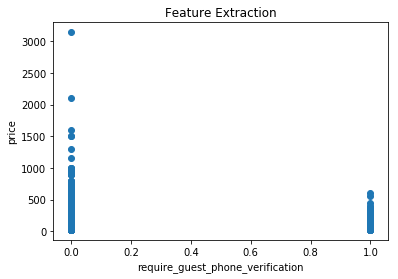

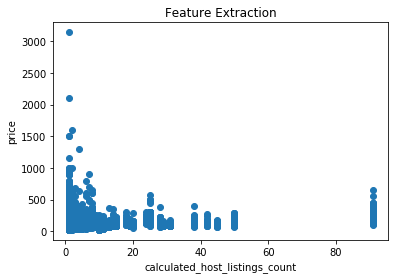

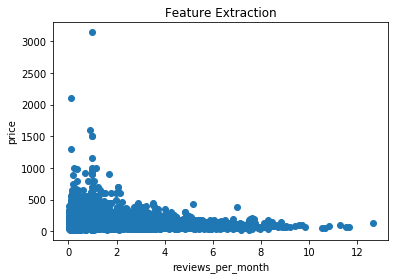

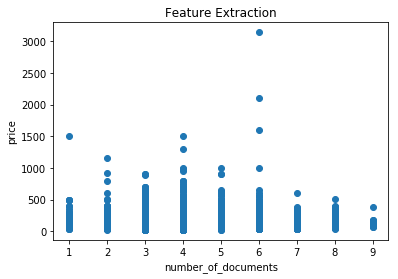

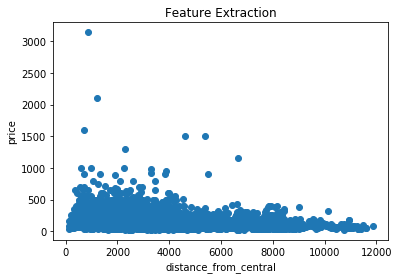

In [22]:
# create a figure and axis
for cols in listings: 
    fig, ax = plt.subplots()

    ax.scatter(listings[cols], listings['price'])
    # set a title and labels
    ax.set_title('Feature Extraction')
    ax.set_xlabel(cols)
    ax.set_ylabel('price')

In [24]:
# removed correlated/similar features

similar_and_lesscorrelated_columns = ['calculated_host_listings_count','host_listings_count', 'availability_30', 
                      'availability_60', 'availability_90', 'requires_license'
                      ,'review_scores_checkin','host_response_time','cancellation_policy',
                     'review_scores_communication','review_scores_location','review_scores_accuracy']
listings_processed = listings.drop(similar_and_lesscorrelated_columns, axis=1)

#listings.drop(listings[listings['bathrooms'] == 8].index,inplace=True)


In [25]:
# Shuffle the data to ensure a good distribution for the training and testing sets
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

In [26]:
# Split the data into test and training sets

y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)  
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((11384, 30), (3795, 30))

In [27]:
# I am using Random Forest Regressor , Linear Regression , SVR and XGBooster to train data

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost import XGBRegressor


# Creaint a pipeline for Imputer and StandardScalar
pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators=20,random_state=0))

pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                               linear_model.LinearRegression())

pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                               SVR())

pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

pipeline_RF.fit(train_X, train_y)

pipeline_LR.fit(train_X, train_y)

pipeline_SVR.fit(train_X, train_y)

pipeline_XGB.fit(train_X, train_y)

c:\users\akshayk\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[00:30:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_by...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [28]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))

In [29]:
print("Random Forest")
evaluate_model(pipeline_RF, test_X, test_y)
print("Linear Regression")
evaluate_model(pipeline_LR, test_X, test_y)
print("SVR")
evaluate_model(pipeline_SVR, test_X, test_y)
print("XG Boost")
evaluate_model(pipeline_XGB, test_X, test_y)

Random Forest
Median Absolute Error: 20.65
RMSE: 57.3
Linear Regression
Median Absolute Error: 24.19
RMSE: 60.4
SVR
Median Absolute Error: 21.5
RMSE: 71.76
XG Boost
Median Absolute Error: 20.85
RMSE: 54.93


In [30]:
# Lets run PCA with feature to check if it increases the performance

from sklearn.decomposition import PCA

for i in range(5,15):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    # I am using Random Forest Regressor , Linear Regression , SVR and XGBooster to train data

    train_X, test_X, train_y, test_y = train_test_split(principalComponents, y, random_state = 0)  
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    # Creaint a pipeline for Imputer and StandardScalar
    pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                                   RandomForestRegressor(n_estimators=20,random_state=0))

    pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                                   linear_model.LinearRegression())

    pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                                   SVR())

    pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                    XGBRegressor(random_state = 42))

    pipeline_RF.fit(train_X, train_y)

    pipeline_LR.fit(train_X, train_y)

    pipeline_SVR.fit(train_X, train_y)

    pipeline_XGB.fit(train_X, train_y)
    
    print("Random Forest")
    evaluate_model(pipeline_RF, test_X, test_y)
    print("Linear Regression")
    evaluate_model(pipeline_LR, test_X, test_y)
    print("SVR")
    evaluate_model(pipeline_SVR, test_X, test_y)
    print("XG Boost")
    evaluate_model(pipeline_XGB, test_X, test_y)

[00:32:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 36.1
RMSE: 78.67
Linear Regression
Median Absolute Error: 37.36
RMSE: 78.84
SVR
Median Absolute Error: 29.34
RMSE: 81.84
XG Boost
Median Absolute Error: 35.32
RMSE: 76.41
[00:32:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 35.1
RMSE: 77.19
Linear Regression
Median Absolute Error: 36.66
RMSE: 78.02
SVR
Median Absolute Error: 28.84
RMSE: 81.25
XG Boost
Median Absolute Error: 33.8
RMSE: 75.05
[00:32:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 32.15
RMSE: 75.75
Linear Regression
Median Absolute Erro

In [31]:
# As we can conclude PCA is not able to improve mean -square so we are not going to use it

In [32]:
# Using k-cross validation to improve performace
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
cv = KFold(n_splits=10, random_state=42, shuffle=False)
scaler = MinMaxScaler(feature_range=(0, 1))

y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    train_X, test_X, train_y, test_y = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                                   RandomForestRegressor(n_estimators=20,random_state=0))

    pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                                   linear_model.LinearRegression())

    pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                                   SVR())

    pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                    XGBRegressor(random_state = 42))

    pipeline_RF.fit(train_X, train_y)

    pipeline_LR.fit(train_X, train_y)

    pipeline_SVR.fit(train_X, train_y)

    pipeline_XGB.fit(train_X, train_y)
    
    print("Random Forest")
    evaluate_model(pipeline_RF, test_X, test_y)
    print("Linear Regression")
    evaluate_model(pipeline_LR, test_X, test_y)
    print("SVR")
    evaluate_model(pipeline_SVR, test_X, test_y)
    print("XG Boost")
    evaluate_model(pipeline_XGB, test_X, test_y)

Train Index:  [ 1518  1519  1520 ... 15176 15177 15178] 

Test Index:  [   0    1    2 ... 1515 1516 1517]
[00:35:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 20.82
RMSE: 72.87
Linear Regression
Median Absolute Error: 25.59
RMSE: 76.16
SVR
Median Absolute Error: 21.39
RMSE: 86.09
XG Boost
Median Absolute Error: 21.07
RMSE: 71.07
Train Index:  [    0     1     2 ... 15176 15177 15178] 

Test Index:  [1518 1519 1520 ... 3033 3034 3035]
[00:35:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 22.33
RMSE: 91.52
Linear Regression
Median Absolute Error: 24.71
RMSE: 90.63
SVR
Median Absolute Error: 22.78
RMSE: 101.26
XG Boost
Median Absolute Error: 20.08
RMSE: 89.97
Train Index:  [    0     1     2 ... 15

In [35]:
# with k-fold validation mse is reduced between 1-5 depending on Model Used

In [36]:
# XG BOOST performs the best with K-fold cross validation and with general split Random Forest Regressor performs best for Predicting AirBNB price